# **#STEP 1: Checking the accuracy of basic models**





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
#import nltk
#nltk.download('all')

In [3]:
df =pd.read_csv("/content/training_data.csv")
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def models_metrics(true_labels, predicted_labels):
    """
    Computes and displays various evaluation metrics for classification models
    and plots a confusion matrix.

    Parameters:
    true_labels (array-like): The true labels of the dataset.
    predicted_labels (array-like): The predicted labels from the model.

    Returns:
    tuple: A tuple containing precision, recall, F1-score, and accuracy.
    """
    # Calculate metrics
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Confusion Matrix
    conf_mat = confusion_matrix(true_labels, predicted_labels)
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Display metrics
    print(f"ACCURACY SCORE: {accuracy:.4f}")
    print(f"CLASSIFICATION REPORT:")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1 Score: {f1:.4f}")

    return precision, recall, f1, accuracy

# Example Usage
# precision, recall, f1, accuracy = models_metrics(y_true, y_pred)


# LOGISTIC REGRESSION



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
X = df['sentence']
y = df['difficulty']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X,y)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [79]:
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')
classifier.fit(X_train_vec, y_train)
log_reg_pred = classifier.predict(X_test_vec)

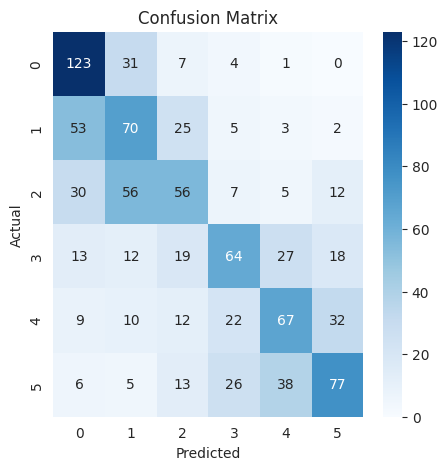

ACCURACY SCORE: 0.4760
CLASSIFICATION REPORT:
	Precision: 0.4756
	Recall: 0.4760
	F1 Score: 0.4702


(0.4756486267355832,
 0.47604166666666664,
 0.4702147380667199,
 0.47604166666666664)

In [80]:
models_metrics(y_test, log_reg_pred)

# K-Nearest Neighbors


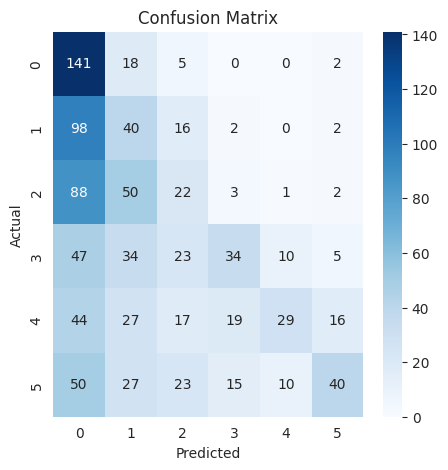

ACCURACY SCORE: 0.3187
CLASSIFICATION REPORT:
	Precision: 0.3902
	Recall: 0.3187
	F1 Score: 0.2948


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
tfidf = TfidfVectorizer(ngram_range=(1,1))
# Create a pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)
y_pred_knn=pipe.predict(X_test)
precision_knn, recall_knn, f1_knn, accuracy_knn = models_metrics(y_test,y_pred_knn)

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

## Looking for the optimal number of tree depth

In [82]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_score

In [83]:
tree_depths = range(1,26)
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_train_vec, y_train, tree_depths)

In [84]:

max_score = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_score]
best_tree_cv_score = cv_scores_mean[max_score]
best_tree_cv_score_std = cv_scores_std[max_score]
print('The optimal depth - {} trees'.format(best_tree_depth, round(best_tree_cv_score*100,5), round(best_tree_cv_score_std*100, 5)))

The optimal depth - 16 trees


##Setting up the model and its parameters

In [89]:
Tree = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=42)
Tree.fit(X_train_vec, y_train)
tree_pred = Tree.predict(X_test_vec)

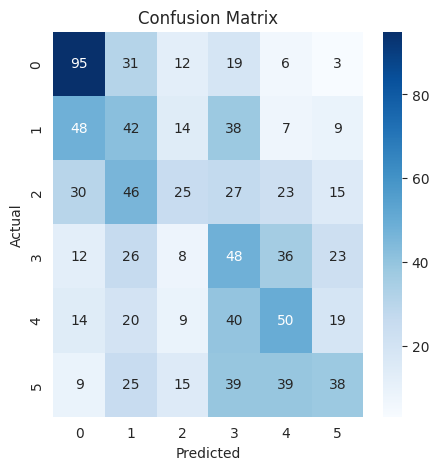

ACCURACY SCORE: 0.3104
CLASSIFICATION REPORT:
	Precision: 0.3139
	Recall: 0.3104
	F1 Score: 0.3029


(0.31390876090707676,
 0.3104166666666667,
 0.30293719272662806,
 0.3104166666666667)

In [90]:

models_metrics(y_test, tree_pred)

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier_rf.fit(X_train_vec,y_train)
y_pred_rf = classifier_rf.predict(X_test_vec)

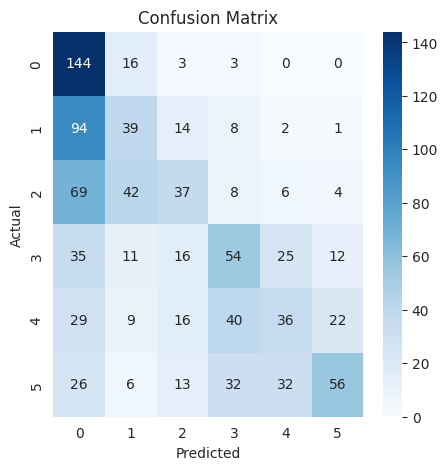

ACCURACY SCORE: 0.3812
CLASSIFICATION REPORT:
	Precision: 0.3966
	Recall: 0.3812
	F1 Score: 0.3593


(0.3966356645615871, 0.38125, 0.35928374102007626, 0.38125)

In [88]:


models_metrics(y_test, y_pred_rf)